---
# Universal Approximation and the GP

## Schwartz May 8 (2022)
---

A GP can theoretically approximate any smooth function with arbitrary accuracy.  Interestingly, neural network (NN) methodology is similarly a theoretically universal approximators (in the limit). In practice, of course, theoretical universality will likey be limited by computational constraints; but, regardless, GP and NN indeed do share much in common as extremely powerful tools for flexible function approximation.

Given the theoretical underpinning of universal approximation, one can view a NN as an approximation of a GP, since if both were applied to approximate the same function then both would theoretically converge to that same function.  This interpretation, however, led to shifting the focus away from NN methodology onto GP methodology, since
- if there is an apparent "universal approximation equvalence" of GP and NN methodologies
- but GP methodology immediately provides appealing distributional aspects that aren't readily apparent in NN methodology 
- and GP methodology appears more theoretically tractable while NN methodology presents many computational bottlenecks

then GP methodology "is clearly preferable" to NN methodology. In retrospect, however, given the dominant resurgence of NN in the form of deep neural networks (DNN), this has been retroactively viewed as being a mistake given that GP methodology has not provided the same empirical successes and DNN methodology.

Nonetheless, the basis of the "Dropout is Bayes" paradigm rests on a NN approximation of a GP. Given this, the first issue that needs to be overcome is that a GP is a *stochastic process* while a NN apparently is not.  This will be remedied by making a NN behave like a *stochastic process* by using an MC-Dropout NN.  To make the complete mathematical approximation connection, however, will require the more involved approximation of an approximation of a GP by a NN

$$\text{Dropout NN} \overset{\text{approximates}}{\longrightarrow} \text{Sparse Spectrum GP} \overset{\text{approximates}}{\longrightarrow} \text{GP (which is a posterior distribution)}$$

---
#  A History of Why MC-Dropout NN Can Provide Bayesian Approximation:

## Schwartz Sep 22 (2021) / Tan Dec 16 / Schwartz Dec 20 + revised May 8 (2022) 

- Haining Tan Feb 18 (2022) / Schwartz May 8 adapting PyMC3 (GP_and_Dropout.ipynb)
---


1. Kingma, Salimans, and Welling (KSW2015) -- in Sections 3.1-3.3 of [Variational Dropout and the Local Reparameterization Trick](https://arxiv.org/abs/1506.02557) -- propose Bayesian approximation via variational inference (VI) of a gaussian dropout neural network 
  > $w^{(h)}_{jk} =  \theta^{(h)}_{jk} \times \xi^{(h)}_{jk},\; \underset{\text{Gaussian "dropout"}}{\xi^{(h)}_{jk}\sim N(1,\alpha)}$ with (improper log uniform) prior $p(\log |w^{(h)}_{jk}|) \propto c$
  >
  > where 
  > - "dropout rate" $\alpha$ and $\theta^{(h)}_{jk}$ are variational parameters defining the variational distribution $q(w^{(h)}_{jk}) \equiv N\left(\theta^{(h)}_{jk}, \alpha(\theta^{(h)}_{jk})^2 \right)$ approximating the posterior (via VI) 
  > - the prior is chosen so no shrinkage (i.e., bias) is induced on the weights $w^{(h)}_{jk}$, thus the only form of regularization present is "dropout" $\delta^{(h)}_{jk}$
  > - and ideally, then, $\alpha$ and $\theta^{(h)}_{jk}$ may then be interpreted as characterizing uncertainty rather than simply as a regularization tool.
  
2. Hron, Matthews, and Ghahramani (HMG2017) -- in Section 2 of [Variational Gaussian Dropout is not Bayesian](https://arxiv.org/abs/1711.02989) -- show that the improper prior of KSW2015 induces an improper posterior.
  > - Thus, the KSW2015 "posterior" being "approximated" (via VI) does not exist,
  > - and thus the method has no Bayesian approximation interpretation
  >   > (even though the method does in fact have good properties as an optimzation objective function).
  
3. Gal and Ghahramani [i.e., G in HMG2017] (GG2017) -- in [Dropout as a Bayesian Approximation:
Representing Model Uncertainty in Deep Learning](https://arxiv.org/abs/1506.02142) and with fuller explanatory details available in [Dropout as a Bayesian Approximation: Appendix](https://arxiv.org/abs/1506.02157) and [Chapter 6 of Gal's PhD Thesis](https://t.co/YXw7UX7I9P?amp=1) -- then show that there is a different perspective of a MC-Dropout NN which can be characterized as Bayesian approximation; namely,

  $$\overset{\text{NN prediction based on}}{\underset{\text{Monte Carlo point masses}}{\text{MC-Dropout NN}}} \underset{\text{approximates}}{\overset{\text{NN optimization}}{\longrightarrow}} \text{Sparse Spectrum GP} \underset{\text{"via VI"}}{\overset{approx.}{\longrightarrow}} \text{GP}$$

  To understand what's happening here, we need to understand that a *stochastic process* is a *distribution*; thus, there are *variational stochastic process* which can be used to approximate other *stochastic processes*. So, the above sequence of approximations means that a *sparse spectrum GP* (used as a *variational stochastic process*, i.e., a *variational distribution*) is used to approximate ("via VI") a posterior distribution which is a GP (which will follow on the basis standard conjugate priors); but, the *sparse spectrum GP* is itself approximated ("via VI") by an optimized MC-Dropout NN (itself being used a *variational stochastic process* i.e., a *variational distribution*):

  $$ \underbrace{w^{(h)}_{jk} \sim p^{(h)}N(m^{(h)}_{jk}, \sigma^2) + (1-p^{(h)})N(0, \sigma^2)}_{\text{a sparse spectrum GP takes this form and approximates a GP}} \overset{\sigma \rightarrow 0}{\approx} \underbrace{z^{(h)}_k m^{(h)}_{jk} + 0\times(1-z^{(h)}_{jk}), \; z^{(h)}_{jk} \sim bin(p^{(h)})}_{\text{a dropout NN where $z^{(h)}_{jk}$ is always Monte Carlo sampled}}$$

  So while KSW2015 focuses interpretation on the variational distributions of each $w^{(h)}_{jk}$, GG2017 focuses interpretation on the entire NN prediction object itself as a *variational stochastic process* which is optimized to approximate ("via VI") a *sparse spectrum GP* (which in turn is a *variational stochastic process* used "via VI" to approximate a posterior distribution which is a GP). Thus, more simply, optimizing a MC-Dropout model means approximating a *sparse spectrum GP* which in turn tries to approximate a posterior distribution which is a GP.
  
  > Binary Dropout: $\tilde w^{(h)}_{jk} =  w^{(h)}_{jk} \times z^{(h)}_{jk}, \; z_{jk}^{(h)} \sim bin(p^{(h)})\;$ so that input $j$ into node $k$ is "cut"
  > - $w^{(h)}_{jk}$ are initialized with scale $1/p^{(h)}$ and all $z_{jk}$ are resampled for each forward pass and persist through the next backward pass
  > - predictions after training can set $z_j = 1$ and scale $w^{(h)}_{jk}$ $p^{(h)}$ so $E[xW]=E[x\tilde W]$, but the *stochastic process* resamples $z_j$
  > - Other dropout forms (e.g., Gaussian Dropout) can be used in this development, but these are not detailed in the paper
  >
  > GP: a distribution over functions defined by a *kernel function* that can be used as a prior and posterior in Bayesian analysis.
  >  - An MC-dropout model above approximates a GP because a supervised learning objective (i.e., classification or regression) along with $L_2$ regularization on $w^{(h)}_{jk}$ (and the standard bias parameters) along with Dropout layers results in the same objective function as that for *sparse spectrum GP* (i.e., sparse weighted basis function) approximation of GP.
  >  - I.e., a GP instantiates a covariance matrix which transforms of an independent multivariate normal (MVN) into an arbitrary MVN; and, this matrix transofrmation may be "sparsified" in a spectral (i.e., SVD) manner using a selection prior.
  > - However, take care to note that a GP is not in general calibrated probability model since the choice of covariance function dictates the behavior of extrapolation uncertainty.
  >
  > Some of the key object notations in the paper are as follows.
  > - $\tau$ the precision of the residual of data modeled with a GP
  > - $\sigma \rightarrow 0$ which is used to mathematically approximate dropout (two point mass distribution) with a two component mixture of (spikey) normal distributions **viewed as a variational HYPERparameter** (to be tuned/selected)
  > - $p^{(h)}_{j}$ the dropout probability **viewed as a variational HYPERparameter** (to be tuned/selected)
  > - $m^{(h)}_{jk}$ the location of the nonzero mass component **viewed as a variational parameter** (to be optimized)
  > - $l$ (and $l'$ and $K$) which are so-called prior length-scales allowing for informative prior specifications 
  >     - $p_l(\tilde w^{(h)}_{jk})$ the prior specification
  >     - $p(\tilde w^{(h)}_{jk}|\mathcal D)$ the true posterior distribution 
  >     - $q_{p_j^{(h)}}(\tilde w^{(h)}_{jk}|\mathcal D)$ the variational distribution approximating the posterior  which is optimized for the *reconstruction* loss and the KL-divergence against the prior
  >    - and where, for sparse spectral GP approximation and dropout approximation of sparse spectral GP approximation the variational distributions are, respectively
  >
  >      $$p^{(h)}N(m_{jk}^{(h)}, \sigma^2) + (1-p^{(h)})N(0, \sigma^2) \overset{\sigma \rightarrow 0}{\approx}  z_j^{(h)} m^{(h)}_{jk} + (1-z_j^{(h)}), \; z_j^{(h)} \sim bin(p^{(h)})$$

In [14]:
# TensorFlow MC-dropout Bayesian linear regression: using https://tensorchiefs.github.io/dl_book/
# https://colab.research.google.com/github/tensorchiefs/dl_book/blob/master/chapter_08/nb_ch08_03.ipynb

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers
import tensorflow_probability as tfp

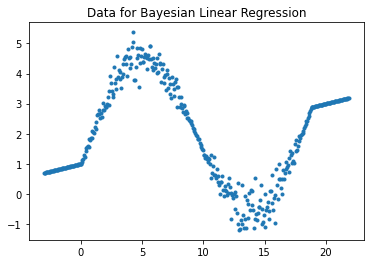

In [15]:
# TensorFlow MC-dropout Bayesian linear regression: using https://tensorchiefs.github.io/dl_book/
# https://colab.research.google.com/github/tensorchiefs/dl_book/blob/master/chapter_08/nb_ch08_03.ipynb

def generate_data(n):
  np.random.seed(1)
  x = np.linspace(0, 2*np.pi, n)
  y = 3 * np.sin(x)
  y_noise = np.concatenate((np.zeros(60), 
                            y + np.random.normal(0, 0.15*np.abs(y), n), 
                            np.zeros(60)))
  x_extended = np.concatenate((np.linspace(-3, 0, 60), 
                               np.linspace(0, 6*np.pi, n),
                               np.linspace(6*np.pi, 6*np.pi + 3, 60)))
  y_reg = y_noise + 0.1 * x_extended + 1
  return x_extended, y_reg

x, y = generate_data(300)
plt.plot(x, y, '.')
plt.title("Data for Bayesian Linear Regression")
plt.show()

2022-05-08 21:51:15.427695: W tensorflow/python/util/util.cc:368] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


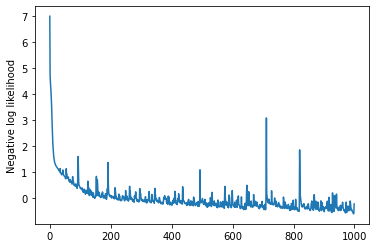

In [16]:
# TensorFlow MC-dropout Bayesian linear regression: using https://tensorchiefs.github.io/dl_book/
# https://colab.research.google.com/github/tensorchiefs/dl_book/blob/master/chapter_08/nb_ch08_03.ipynb

# Model 1: standard neural network

def neg_loglike(target, pred_distribution):
  return -pred_distribution.log_prob(target)

def output_normal(params):
  return tfp.distributions.Normal(
      # mean and variance learned from the previous layer
      loc=params[:,0:1],
      scale=1e-3 + tf.math.softplus(0.05 * params[:, 1:2])
  )

inputs = layers.Input(shape=(1,))
features = layers.Dense(50, activation="relu")(inputs)
features = layers.Dense(50, activation="relu")(features)
features = layers.Dense(50, activation="relu")(features)
params = layers.Dense(2)(features)
pred_distribution = tfp.layers.DistributionLambda(output_normal)(params)

model1 = tf.keras.Model(inputs=inputs, outputs=pred_distribution)
model1.compile(tf.keras.optimizers.Adam(), loss=neg_loglike)

# fit model 1 
history1 = model1.fit(x, y, epochs=1000, verbose=0, batch_size=32)
plt.plot(history1.history['loss'])
plt.ylabel("Negative log likelihood")
plt.show()

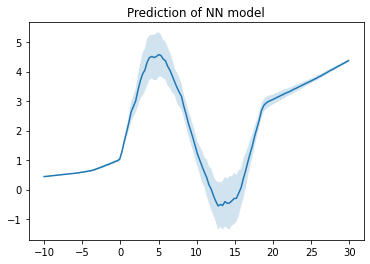

In [17]:
# TensorFlow MC-dropout Bayesian linear regression: using https://tensorchiefs.github.io/dl_book/
# https://colab.research.google.com/github/tensorchiefs/dl_book/blob/master/chapter_08/nb_ch08_03.ipynb

# Model 1 predictions for test
x_test = np.arange(-10, 30, 0.3)

predictions = []
for i in range(200):
  predictions.append(model1.predict(x_test))
predictions = np.array(predictions)
mu = np.squeeze(np.mean(predictions, axis=0))
std = np.squeeze(np.std(predictions, axis=0))

plt.plot(x_test, mu, label="Mean prediction")
plt.fill_between(x_test, mu - 2*std, mu + 2 * std, alpha=0.2)
plt.title("Prediction of NN model")
plt.show()

/Users/schwarls37/opt/miniconda3/envs/STA410/lib/python3.9/site-packages/tensorflow_probability/python/layers/util.py:95: UserWarning: `layer.add_variable` is deprecated and will be removed in a future version. Please use `layer.add_weight` method instead.
  loc = add_variable_fn(
/Users/schwarls37/opt/miniconda3/envs/STA410/lib/python3.9/site-packages/tensorflow_probability/python/layers/util.py:105: UserWarning: `layer.add_variable` is deprecated and will be removed in a future version. Please use `layer.add_weight` method instead.
  untransformed_scale = add_variable_fn(


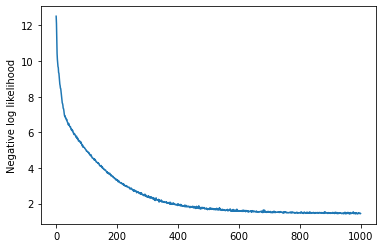

In [18]:
# TensorFlow MC-dropout Bayesian linear regression: using https://tensorchiefs.github.io/dl_book/
# https://colab.research.google.com/github/tensorchiefs/dl_book/blob/master/chapter_08/nb_ch08_03.ipynb

# Model 2: (Bayesian) Variance Inference
def kernel_divergence_fn(q, p, _):
  return tfp.distributions.kl_divergence(q, p) / x.shape[0]
def bias_divergence_fn(q, p, _):
  return tfp.distributions.kl_divergence(q, p) / x.shape[0]

inputs = layers.Input(shape=(1,))

# The Flipout estimator [(Wen et al., 2018)][1]: https://arxiv.org/abs/1803.04386 
# https://www.tensorflow.org/probability/api_docs/python/tfp/layers/DenseFlipout.
# "performs a Monte Carlo approximation of the distribution integrating over the kernel and bias"
# "uses roughly twice as many floating point operations as the reparameterization estimator"
# "has the advantage of significantly lower variance."
features = tfp.layers.DenseFlipout(20, bias_posterior_fn=tfp.layers.util.default_mean_field_normal_fn(),
                                   bias_prior_fn=tfp.layers.default_multivariate_normal_fn,
                                   kernel_divergence_fn = kernel_divergence_fn,
                                   bias_divergence_fn = bias_divergence_fn,
                                   activation = "relu")(inputs)
# The original expostion accompanying the code stated "(we don't use a distribution for bias terms)"
# but this is wrong as `bias_posterior_fn=tfp_layers_util.default_mean_field_normal_fn(is_singular=True)`
# and `bias_prior_fn=None` have both been overwritten.

for i in range(2):
  features = tfp.layers.DenseFlipout(20, bias_posterior_fn=tfp.layers.util.default_mean_field_normal_fn(),
                                   bias_prior_fn=tfp.layers.default_multivariate_normal_fn,
                                   kernel_divergence_fn=kernel_divergence_fn,
                                   bias_divergence_fn = bias_divergence_fn,
                                   activation = "relu")(features)
params = tfp.layers.DenseFlipout(2, bias_posterior_fn=tfp.layers.util.default_mean_field_normal_fn(),
                                   bias_prior_fn=tfp.layers.default_multivariate_normal_fn,
                                   kernel_divergence_fn=kernel_divergence_fn,
                                   bias_divergence_fn = bias_divergence_fn,
                                   activation = "relu")(features)
pred_distribution = tfp.layers.DistributionLambda(output_normal)(params)

model2 = tf.keras.Model(inputs=inputs, outputs=pred_distribution)
model2.compile(tf.keras.optimizers.Adam(), loss=neg_loglike)

history2 = model2.fit(x, y, epochs=1000, verbose=0, batch_size=32)
plt.plot(history2.history['loss'])
plt.ylabel("Negative log likelihood")
plt.show()

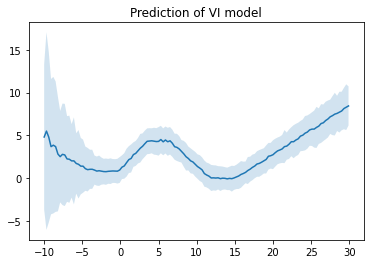

In [19]:
# TensorFlow MC-dropout Bayesian linear regression: using https://tensorchiefs.github.io/dl_book/
# https://colab.research.google.com/github/tensorchiefs/dl_book/blob/master/chapter_08/nb_ch08_03.ipynb

# VI model test
predictions = []
for i in range(200):
  predictions.append(model2.predict(x_test))
predictions = np.array(predictions)
mu = np.squeeze(np.mean(predictions, axis=0))
std = np.squeeze(np.std(predictions, axis=0))

plt.plot(x_test, mu, label="Mean prediction")
plt.fill_between(x_test, mu - 2*std, mu + 2 * std, alpha=0.2)
plt.title("Prediction of VI model")
plt.show()

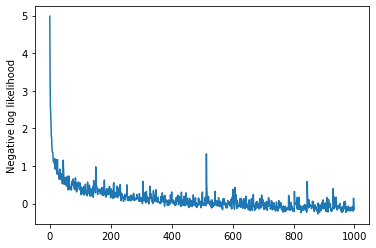

In [20]:
# TensorFlow MC-dropout Bayesian linear regression: using https://tensorchiefs.github.io/dl_book/
# https://colab.research.google.com/github/tensorchiefs/dl_book/blob/master/chapter_08/nb_ch08_03.ipynb

# Model 3 MC-Dropout as Bayesian

inputs = layers.Input(shape=(1,))
features = layers.Dense(500, activation="relu")(inputs)
features = layers.Dropout(0.1)(features, training=True)
for i in range(3):
  features = layers.Dense(500, activation="relu")(features)
  features = layers.Dropout(0.1)(features, training=True)
params = layers.Dense(2)(features)
pred_distribution = tfp.layers.DistributionLambda(output_normal)(params)

model_dropout = tf.keras.Model(inputs=inputs, outputs=pred_distribution)
model_dropout.compile(tf.keras.optimizers.Adam(), loss=neg_loglike)
history3 = model_dropout.fit(x, y, epochs=1000, verbose=0, batch_size=32)
plt.plot(history3.history["loss"])
plt.ylabel("Negative log likelihood")
plt.show()

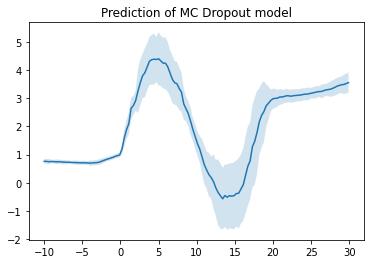

In [30]:
# TensorFlow MC-dropout Bayesian linear regression: using https://tensorchiefs.github.io/dl_book/
# https://colab.research.google.com/github/tensorchiefs/dl_book/blob/master/chapter_08/nb_ch08_03.ipynb

# MC Dropout model test
predictions = []
for i in range(200):
  predictions.append(model_dropout.predict(x_test))
predictions = np.array(predictions)
mu = np.squeeze(np.mean(predictions, axis=0))
std = np.squeeze(np.std(predictions, axis=0))

plt.plot(x_test, mu, label="Mean prediction")
plt.fill_between(x_test, mu - 2*std, mu + 2 * std, alpha=0.2)
plt.title("Prediction of MC Dropout model")
plt.show()

---

## Unimplemented Comparision

Transfer code from `GaussianProcesses.ipynb` to compare to 

- [`tfp.distributions.VariationalGaussianProcess`](https://www.tensorflow.org/probability/api_docs/python/tfp/layers/VariationalGaussianProcess)
- [`tfp.layers.VariationalGaussianProcess`](https://www.tensorflow.org/probability/api_docs/python/tfp/distributions/VariationalGaussianProcess)

---


In [24]:
# Schawrtz May 8 adapted from Haining Tan Feb 18 (2022)

import pymc3 as pm

X = x.reshape(x.shape[0],1)

with pm.Model() as gp_model:
  # Use a exponential quadratic kernel
  ita = pm.HalfNormal('ita', sigma=5)
  iota = pm.Gamma('iota', alpha=4, beta=2)

  sq_exp = ita ** 2 * pm.gp.cov.ExpQuad(input_dim=1, ls=iota)

  gp = pm.gp.Marginal(cov_func=sq_exp)

  sigma = pm.HalfNormal('sigma', sigma=5, testval=1)
  y_ = gp.marginal_likelihood('y', X=X, y=y, noise=sigma)

In [25]:
# Schawrtz May 8 adapted from Haining Tan Feb 18 (2022)

with gp_model:
  tr = pm.sample(target_accept=0.95, return_inferencedata=True)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigma, iota, ita]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 598 seconds.


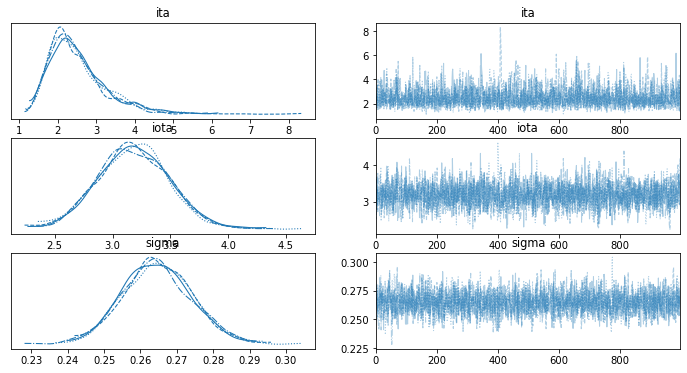

In [26]:
# Schawrtz May 8 adapted from Haining Tan Feb 18 (2022)

import arviz as az

az.plot_trace(tr, var_names=['ita', 'iota', 'sigma'])
plt.show()

In [27]:
# Schawrtz May 8 adapted from Haining Tan Feb 18 (2022)

Xnew = np.linspace(-10 , 30, 100)

with gp_model:
  pred = gp.conditional("pred", Xnew=Xnew[:, np.newaxis])

with gp_model:
  ppred = pm.sample_posterior_predictive(tr, samples=100, var_names=['pred'])

/Users/schwarls37/opt/miniconda3/envs/STA410/lib/python3.9/site-packages/pymc3/sampling.py:1689: UserWarning: samples parameter is smaller than nchains times ndraws, some draws and/or chains may not be represented in the returned posterior predictive sample
  warnings.warn(


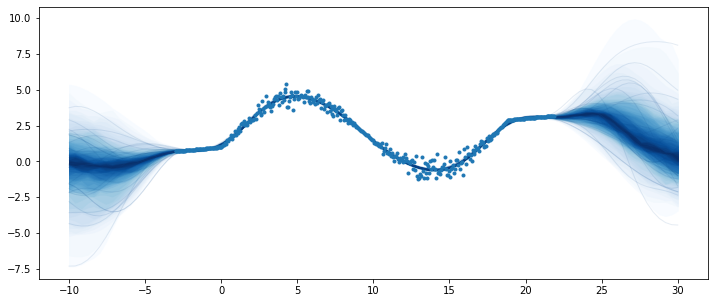

In [28]:
# Schawrtz May 8 adapted from Haining Tan Feb 18 (2022)

fig = plt.figure(figsize=(12, 5))
ax = plt.gca()
pm.gp.util.plot_gp_dist(ax, ppred['pred'], Xnew, plot_samples=True, palette='Blues')
ax.plot(X, y, '.')

---

## Unimplemented Comparisions

- The above PyMC3 comparision is not quite an apples to apples comparision with the BBB and MC-Dropout
- These examples need to be improved and flushed out so they make for a more coherent presentation

---


---
#  Concerns regarding the MC-Dropout Approximation 

## Schwartz Sep 22 (2021) / Tan Dec 16 / Schwartz Dec 20 + revised May 8 (2022) 
---

4. Hron, Matthews, and Ghahramani [i.e., G in HMG2017 and GG2017] (HMG2018) -- in Section 4.1 of [Variational Bayesian dropout: pitfalls and fixes](https://arxiv.org/abs/1807.01969) -- again return to characterize the impact of the distibutional singularity (e.g., point mass) approximation; although, this issue was of course also previously addressed in [Dropout as a Bayesian Approximation: Appendix](https://arxiv.org/abs/1506.02157) (of GG2017) and [Chapter 6 of Gal's PhD Thesis](https://t.co/YXw7UX7I9P?amp=1)).

  > HMG2018 also provides a general framework in which the issues of KSW2015 are also addressed.

5. Strong criticim regarding a perceived behavior of mode collapse failure for the posterior of MC-Dropout with respect to $p^{(h)}_j$ was raised by [Ian Osband](https://mobile.twitter.com/ianosband/status/1014466510885216256?lang=en) (with related commentary available [here](https://www.reddit.com/r/MachineLearning/comments/8w0v9m/d_ian_osband_dropout_posteriors_give_bad/) and [here](https://www.reddit.com/r/MachineLearning/comments/emt4ke/discussion_research_variational_bayesian/), and some additional notes and illustration available [here](http://bayesiandeeplearning.org/2016/papers/BDL_4.pdf)).
 
  > The "mode collapse failure" issue is that dropout rate $p^{(h)}_j$ may not collapse towards $0$ as data increases even when treated as a variational parameter (and certainly won't if treated as a fixed value).
  > - [Chapter 6 of Gal's PhD Thesis](https://t.co/YXw7UX7I9P?amp=1) shows promising theretical results suggesting a minimal role of "mode collapse failure"; however, section 6.4 therein begins examining the various challenges in estimating $p^{(h)}_j$ which do in fact actually exist.
  >
  > - HMG2018 notes that hyperparameters associated with the prior $p_l(\tilde w^{(h)}_{jk})$, i.e., $l$, may work in favor of the intermediate approximation rather than the approximation of the true posterior; however, this does not appear to explain why $p^{(h)}_j$ perform problematically as variational parameters.

---

## Unimplemented Comparisions

- Can the theoretical results of [Chapter 6 of Gal's PhD Thesis](https://t.co/YXw7UX7I9P?amp=1) be shown empirically?

- Can we identify settings where MC-Dropout does not provide good posterior approximation?


---

---
# What Dropout is and Why it's not Bayesian

## Schwartz Feb 15 (2022) + exposition added May 8 

---

NN Dropout multiplies each kernel (weight) element by a noise distribution for each batch of data

> i.e., the weight element persists in its multiplicatively-adjusted form for both Forward and Fackward Pass pair of the Backpropegation Gradient Decent Algorithm.

The most common choice for Dropout is Binary Dropout, but other noise distributions are possible (e.g., Gaussian, as in KSW2015).

> In the case of Binary Dropout, a "dropped out" weight has a value of $0$ and hence it is "cut" from the forward and backward passes of a given batch of data.  

Given the stochasticity of this process, [a Bayesian attempt to model a Droupout specification](https://discourse.pymc.io/t/frequency-of-missing-value-imputation/8809) might look like

\begin{align*}
y_i = {} & \beta_0 + \sum_{j=1}^p \delta_j \beta_j x_{ij} + \epsilon_i \\
\epsilon_i \sim {} & N(0,\sigma^2)\\
\delta_j \sim {} & Bin(p) \quad\;\;\; \text{which is called a "selection prior"}\\
\beta_j \sim {} & N(0,\sigma^2_0) \quad \text{which with $\delta_j$ makes for a sort of a "spike-and-slab prior"}\\
\end{align*}

where $p$ is the "dropout rate" which "cuts" and "drops out" coefficients.

As can be seen from the above specification, since dropout should be stochastic the $\delta_j$ are specified to be unobserved random variables. In PyMC unobserved random variables are just parameters; and, (awesomely) because of working in a Bayesian framework, unobserved data can also simply be viewed as unobserved random variables which are simply imputed according to the hierarchical probability structure of the data generating mechanism.  

> In PyMC, missing data is simply indicated as numerical `NA` using a `np.ma.masked_array`. This directs PyMC that since the "observation" is missing it should be treated as an unobserved random variable, i.e., a parameter.

If you have noticed the problem with this specification (with respect to modelling Dropout in Backpropegation), then you're doing very well!  The issue is that, rather than continuous Monte Carlo sampling of $\delta_j$ throughout the MCMC simulation process, MCMC instead produces the posterior distribution $p(\delta_j|-)$.

- This clarifies that (obviously) MCMC is not Backpropegation; thus, the Monte Carlo behavior of MC-dropout cannot be formulated as a Bayesian posterior.


In [ ]:
# Schwartz Feb 15 + revised May 8 

n = 100
x = np.random.normal(loc=10, size=n)

width,depth=10,1
# originally, I had thought that by masking this variable, it would be continuously imputed
d = np.zeros((width,depth)) # by sampling it from its PRIOR distribution; but, actually...
d = np.ma.masked_array(d, mask = d==0) # it's (obviously) imputed by sampling from it's posterior!
# MCMC simulates the posterior distribuiton of the unknown parameter of a hierarchical probability structure
# so `d` is sampled from it's posterior conditional on the data, and not just Monte Carlo sampled from the prior

---
# MCMC Posterior Sampling Schemes

## Schwartz Feb 15 (2022) + exposition added May 8 

---

Below the follow MCMC schemes for sampling from the posterior distribution of the "Attmpted Bayesian Dropout" model are demonstrated:

- HMC within Gibbs
- Slice Gibbs sampling
- Metropolis(-Hastings) within Gibbs

Because the No U-Turn Sampler (NUTS) implemention of Hamiltonian MC (HMC) in PyMC3 only works for continuous random variables, it can only be applied to the continuously distributed $\beta_j$ coefficient parameteres.  Thus, the MCMC algorithm must alternate betweeen (a) sampling from the posteriors of the discrete random variables and (b) sampling from the posteriors of the continuous random variables.  

- Such an alternating scheme is called Gibbs sampling.

But, the sampling of continuous variables need not be based on NUTS/HMC. E.g., the full conditional distributions of the continuous distributions under this Gibbs sampling framework could be sampled using Metropolis-Hastings proposals which leads to a so-called Metropolis within Gibbs algorithm.  A further choice is to use Slice Gibbs samping, where the continuous full conditional distributions are sampled using a slice sampling algorithm.

By observing the behavior of the different posterior chains for `d` created by these different sampling schemes, the "sticky" nature of the posterior chains for `d` becomes evident.  In tern, because of the full conditional sampling nature of the Gibbs sampling algorithm, it becomes clear that `d` are "sticky" exactly because they are being sampled from their full conditional distributions (obviously). And thus since the Gibbs MCMC sampling algorithm produces samples from the full posterior distributions by sampling from the conditional posterior distributions, the MCMC `d` samples are from the posterior distribution of `d`.

Thus, the `d` are "sticky" because for a given full conditional setting of the conditional posterior distribution of `d`, the current variable selection pattern does not want to change. And thus the samples from the posterior distribution of `d` do not produce any MC-dropout behavior.

/Users/schwarls37/opt/miniconda3/envs/STA410/lib/python3.9/site-packages/pymc3/model.py:1755: ImputationWarning: Data in dropout contains missing values and will be automatically imputed from the sampling distribution.
  warnings.warn(impute_message, ImputationWarning)
/var/folders/69/4n0cxvc52gl8cvmf7qn06jr00000gn/T/ipykernel_91925/4027339858.py:26: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace = pm.sample(200, tune=200, chains=2)
Only 200 samples in chain.
Multiprocess sampling (2 chains in 4 jobs)
CompoundStep
>BinaryGibbsMetropolis: [dropout_missing]
>NUTS: [prior]


Sampling 2 chains for 200 tune and 200 draw iterations (400 + 400 draws total) took 16 seconds.
The rhat statistic is larger than 1.2 for some parameters.
The number of effective samples is smaller than 10% for some parameters.


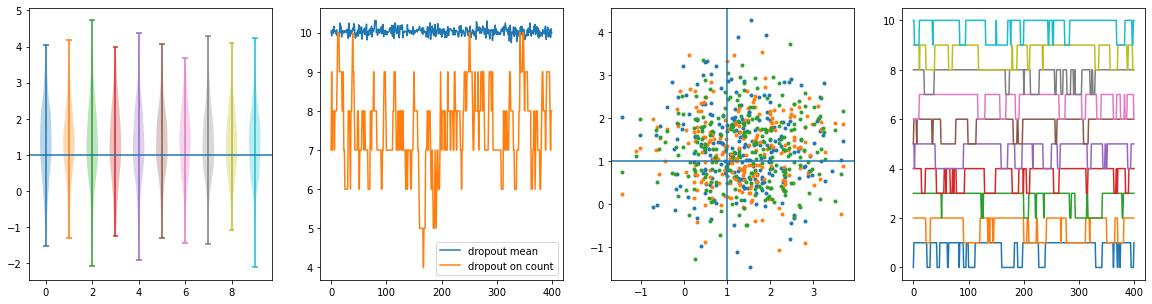

In [32]:
# Schwartz Feb 15 + revised May 8 

# HMC within Gibbs

with pm.Model() as dropout_network:
    dropout_rate = 0.5
    dropout_layers = pm.Bernoulli("dropout", p=dropout_rate, shape=d.shape, observed=d)
    mu = pm.Normal("prior", shape=d.shape)
    pm.Normal("likelihood", mu=mu.T.dot(dropout_layers), sigma=1, observed=x)

with dropout_network:
    trace = pm.sample(200, tune=200, chains=2)
    
fit,ax = plt.subplots(1,4, figsize=(20,5))
for i in range(width):
  ax[0].violinplot(trace.prior[trace.dropout_missing[:,i]==1,i,0], positions=[i])
ax[0].axhline(1)
ax[1].plot((trace.prior[:,:,0]*trace.dropout_missing).sum(axis=1),label='dropout mean')
ax[1].plot(trace.dropout_missing.sum(axis=1),label='dropout on count')
ax[1].legend()
for i in range(6,7):
  for j in range(7,10):
    kp = trace.dropout_missing[:,i]==1
    kp = kp & (trace.dropout_missing[:,j]==1)
    ax[2].plot(trace.prior[kp,i,0], trace.prior[kp,j,0],'.')
ax[2].axhline(1)
ax[2].axvline(1)
for i in range(10):
  ax[3].plot(trace.dropout_missing[:,i]+i)    

/Users/schwarls37/opt/miniconda3/envs/STA410/lib/python3.9/site-packages/pymc3/model.py:1755: ImputationWarning: Data in dropout contains missing values and will be automatically imputed from the sampling distribution.
  warnings.warn(impute_message, ImputationWarning)
/var/folders/69/4n0cxvc52gl8cvmf7qn06jr00000gn/T/ipykernel_91925/1902325900.py:13: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace = pm.sample(200, step=step, tune=200, chains=2)
Only 200 samples in chain.
Multiprocess sampling (2 chains in 4 jobs)
CompoundStep
>Slice: [prior]
>Slice: [dropout_missing]


Sampling 2 chains for 200 tune and 200 draw iterations (400 + 400 draws total) took 11 seconds.
/Users/schwarls37/opt/miniconda3/envs/STA410/lib/python3.9/site-packages/arviz/stats/diagnostics.py:561: RuntimeWarning: invalid value encountered in double_scalars
  (between_chain_variance / within_chain_variance + num_samples - 1) / (num_samples)
The rhat statistic is larger than 1.4 for some parameters. The sampler did not converge.
The number of effective samples is smaller than 10% for some parameters.


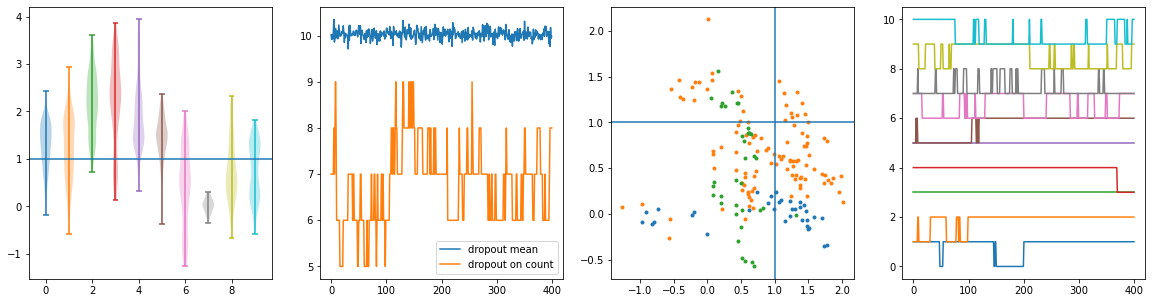

In [33]:
# Schwartz Feb 15 + revised May 8 

# Slice Gibbs Sampling

with pm.Model() as dropout_network:
    dropout_rate = 0.5
    dropout_layers = pm.Bernoulli("dropout", p=dropout_rate, shape=d.shape, observed=d)
    mu = pm.Normal("prior", shape=d.shape)
    pm.Normal("likelihood", mu=mu.T.dot(dropout_layers), sigma=1, observed=x)
    step = pm.Slice()

with dropout_network:
    trace = pm.sample(200, step=step, tune=200, chains=2)
    
fit,ax = plt.subplots(1,4, figsize=(20,5))
for i in range(width):
  ax[0].violinplot(trace.prior[trace.dropout_missing[:,i]==1,i,0], positions=[i])
ax[0].axhline(1)
ax[1].plot((trace.prior[:,:,0]*trace.dropout_missing).sum(axis=1),label='dropout mean')
ax[1].plot(trace.dropout_missing.sum(axis=1),label='dropout on count')
ax[1].legend()
for i in range(6,7):
  for j in range(7,10):
    kp = trace.dropout_missing[:,i]==1
    kp = kp & (trace.dropout_missing[:,j]==1)
    ax[2].plot(trace.prior[kp,i,0], trace.prior[kp,j,0],'.')
ax[2].axhline(1)
ax[2].axvline(1)
for i in range(10):
  ax[3].plot(trace.dropout_missing[:,i]+i)    

/Users/schwarls37/opt/miniconda3/envs/STA410/lib/python3.9/site-packages/pymc3/model.py:1755: ImputationWarning: Data in dropout contains missing values and will be automatically imputed from the sampling distribution.
  warnings.warn(impute_message, ImputationWarning)
/var/folders/69/4n0cxvc52gl8cvmf7qn06jr00000gn/T/ipykernel_91925/3535697355.py:16: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace = pm.sample(200, step=step, tune=200, chains=2)
Only 200 samples in chain.
Multiprocess sampling (2 chains in 4 jobs)
CompoundStep
>Metropolis: [prior]
>BinaryGibbsMetropolis: [dropout_missing]


/Users/schwarls37/opt/miniconda3/envs/STA410/lib/python3.9/site-packages/pymc3/step_methods/metropolis.py:226: RuntimeWarning: overflow encountered in exp
  "accept": np.exp(accept),
/Users/schwarls37/opt/miniconda3/envs/STA410/lib/python3.9/site-packages/pymc3/step_methods/metropolis.py:226: RuntimeWarning: overflow encountered in exp
  "accept": np.exp(accept),
Sampling 2 chains for 0 tune and 400 draw iterations (0 + 800 draws total) took 9 seconds.
The rhat statistic is larger than 1.4 for some parameters. The sampler did not converge.
The estimated number of effective samples is smaller than 200 for some parameters.


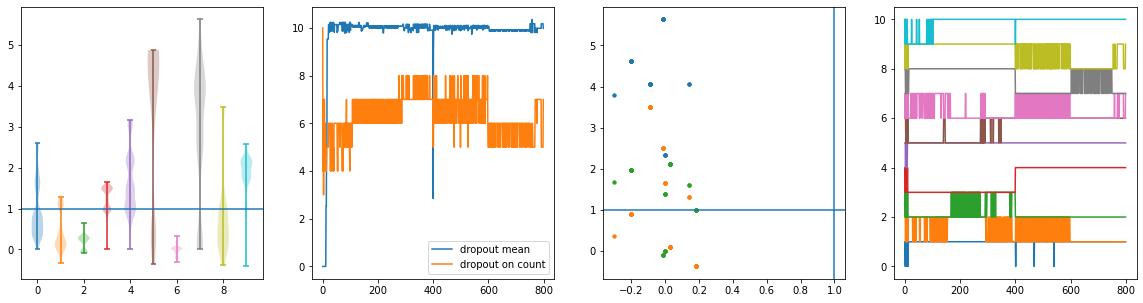

In [34]:
# Schwartz Feb 15 + revised May 8 

# Slice Gibbs Sampling
with pm.Model() as dropout_network:
    dropout_rate = 0.5
    dropout_layers = pm.Bernoulli("dropout", p=dropout_rate, shape=d.shape, observed=d)
    mu = pm.Normal("prior", shape=d.shape)
    pm.Normal("likelihood", mu=mu.T.dot(dropout_layers), sigma=1, observed=x)
    step = pm.Metropolis([mu], tune=False)#, S=np.array([5]), proposal_dist=pm.UniformProposal)

with dropout_network:
    trace = pm.sample(200, step=step, tune=200, chains=2)
    
fit,ax = plt.subplots(1,4, figsize=(20,5))
for i in range(width):
  ax[0].violinplot(trace.prior[trace.dropout_missing[:,i]==1,i,0], positions=[i])
ax[0].axhline(1)
ax[1].plot((trace.prior[:,:,0]*trace.dropout_missing).sum(axis=1),label='dropout mean')
ax[1].plot(trace.dropout_missing.sum(axis=1),label='dropout on count')
ax[1].legend()
for i in range(6,7):
  for j in range(7,10):
    kp = trace.dropout_missing[:,i]==1
    kp = kp & (trace.dropout_missing[:,j]==1)
    ax[2].plot(trace.prior[kp,i,0], trace.prior[kp,j,0],'.')
ax[2].axhline(1)
ax[2].axvline(1)
for i in range(10):
  ax[3].plot(trace.dropout_missing[:,i]+i)    

## Further Reading

- Some "CSC 412/2506: Probabilistic Learning and Reasoning" course notes covering MCMC are available [here](https://erdogdu.github.io/csc412/slides/w05/sld05-1.pdf) and [here](https://erdogdu.github.io/csc412/slides/w05/sld05-2.pdf)

- A presentation of the Metropolis-Hastings (MH) algorithm is available [here](https://www.youtube.com/watch?v=0lpT-yveuIA)

- My preferred Hamiltonian Monte Carlo (HMC) manuscript is the "original" [Radford Neal](https://arxiv.org/abs/1206.1901) but there is also an introduction from [Batencourt](https://arxiv.org/abs/1701.02434) which provides a similar introduction.